<a href="https://colab.research.google.com/github/Abhishek9264/model/blob/main/emailspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.duplicated().sum()

178

In [ ]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df['label_num'].value_counts()

0    3531
1    1462
Name: label_num, dtype: int64

In [ ]:
df['label_num']=df['label_num'].astype('int64')

<ipython-input-9-3f23d76d5f87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_num']=df['label_num'].astype('int64')


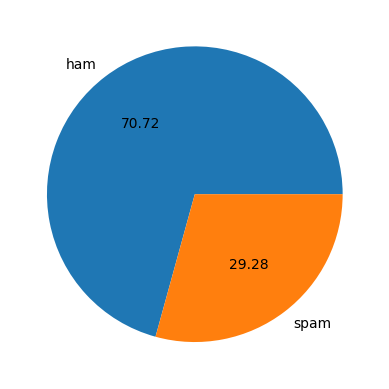

In [ ]:
plt.pie(df['label_num'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_char']=df['text'].apply(len)
df

<ipython-input-14-1e8acb4644df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


,label,text,label_num,num_char
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336
...,...,...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch...",0,869
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0,534
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114
5169,ham,Subject: industrial worksheets for august 2000...,0,573


In [ ]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df

<ipython-input-15-642364f19535>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,label,text,label_num,num_char,num_word
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71
...,...,...,...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch...",0,869,197
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0,534,156
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306
5169,ham,Subject: industrial worksheets for august 2000...,0,573,112


In [ ]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

<ipython-input-16-173d26439957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,label,text,label_num,num_char,num_word,num_sent
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3
...,...,...,...,...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch...",0,869,197,9
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,7
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,13
5169,ham,Subject: industrial worksheets for august 2000...,0,573,112,20


In [ ]:
df[df['label_num']==0][['num_word','num_sent','num_char']].describe()

,num_word,num_sent,num_char
count,3531.000000,3531.000000,3531.000000
mean,230.516001,11.662419,994.939394
std,337.018933,25.330035,1402.785831
min,3.000000,1.000000,18.000000
25%,53.000000,4.000000,241.000000
50%,128.000000,7.000000,538.000000
75%,298.500000,13.500000,1253.500000
max,8863.000000,1204.000000,32258.000000


In [ ]:
df[df['label_num']==1][['num_word','num_sent','num_char']].describe()

,num_word,num_sent,num_char
count,1462.000000,1462.000000,1462.000000
mean,241.315321,17.551984,1249.326265
std,349.439381,33.111447,1840.112883
min,2.000000,1.000000,11.000000
25%,60.000000,4.000000,304.250000
50%,119.500000,9.000000,589.000000
75%,252.750000,19.000000,1305.000000
max,3963.000000,693.000000,22073.000000


In [ ]:
import seaborn as sns


<Axes: xlabel='num_word', ylabel='Count'>

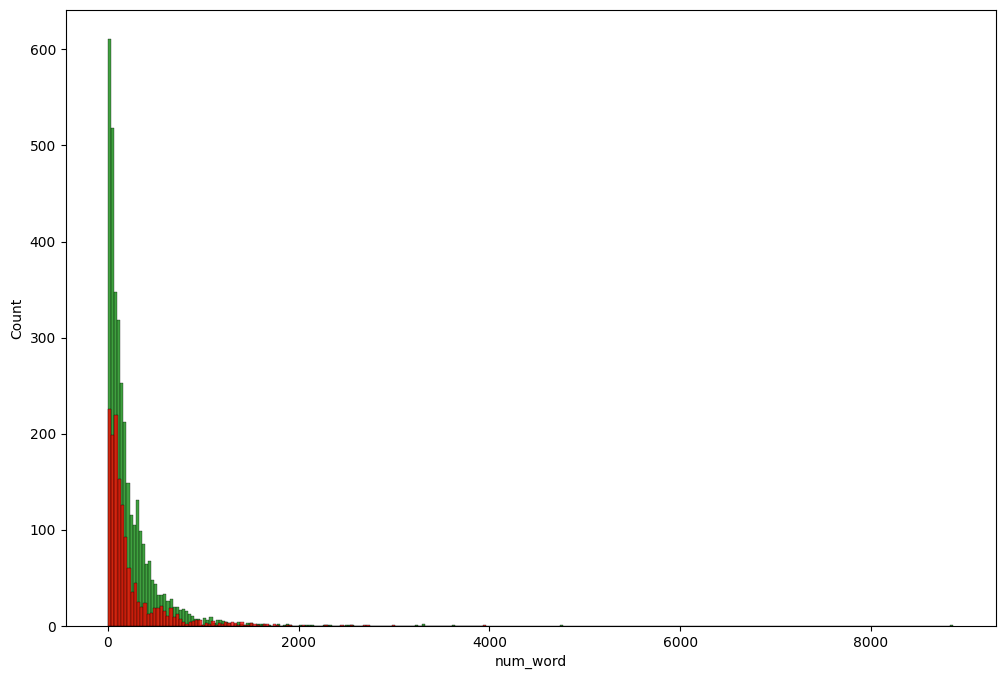

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label_num']==0]['num_word'],color='green')
sns.histplot(df[df['label_num']==1]['num_word'],color='red')


<Axes: xlabel='num_sent', ylabel='Count'>

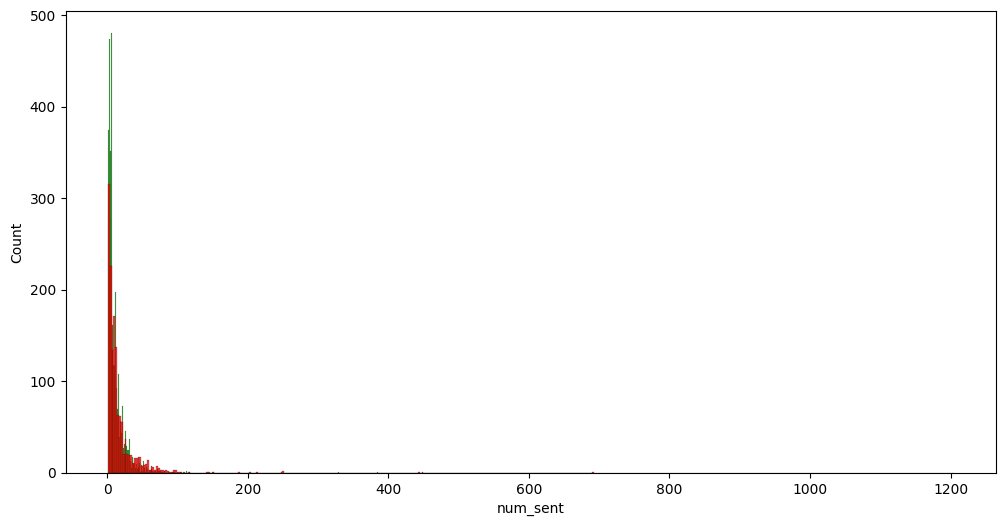

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num']==0]['num_sent'],color='green')
sns.histplot(df[df['label_num']==1]['num_sent'],color='red')


<Axes: xlabel='num_char', ylabel='Count'>

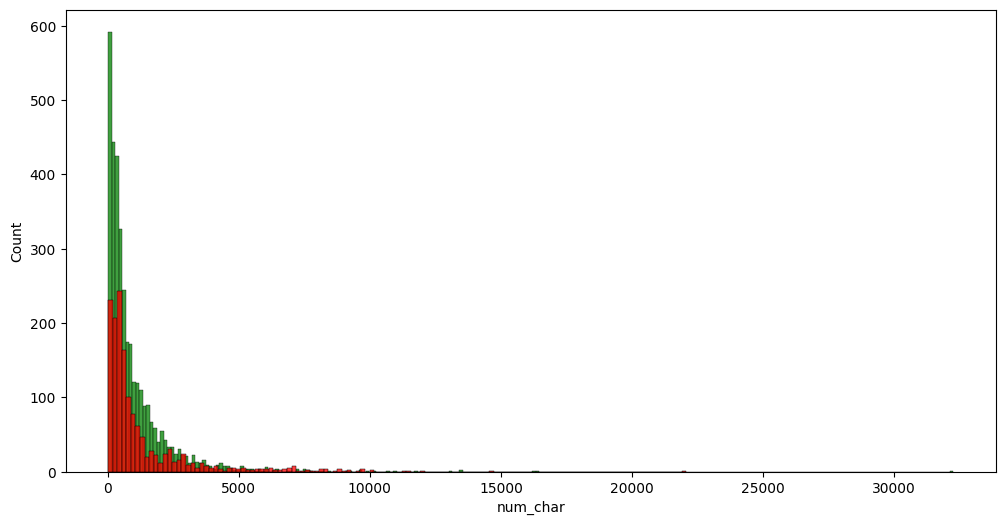

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num']==0]['num_char'],color='green')
sns.histplot(df[df['label_num']==1]['num_char'],color='red')


In [ ]:
(df.corr()['label_num'])

<ipython-input-23-47e231524c2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr()['label_num'])


label_num    1.000000
num_char     0.074794
num_word     0.014425
num_sent     0.095863
Name: label_num, dtype: float64

<ipython-input-24-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

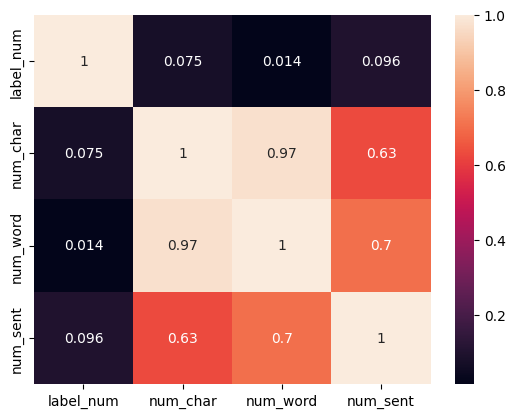

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [ ]:
def tran_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['trans_text']=df['text'].apply(tran_text)
df['trans_text']

<ipython-input-30-6434936201c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_text']=df['text'].apply(tran_text)


0       subject enron methanol meter 988291 follow not...
1       subject hpl nom januari 9 2001 see attach file...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5165    subject fw crosstex energi driscol ranch 1 3 m...
5166    subject put 10 ft transport volum decreas 2500...
5167    subject 3 4 2000 follow nom hpl take extra 15 ...
5169    subject industri worksheet august 2000 activ a...
5170    subject import onlin bank alert dear valu citi...
Name: trans_text, Length: 4993, dtype: object

In [ ]:
df['trans_text'][0]

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(height=400,width=400,background_color='black',min_font_size=10)
spam=wc.generate(df[df['label_num']==1]['trans_text'].str.cat(sep=" "))


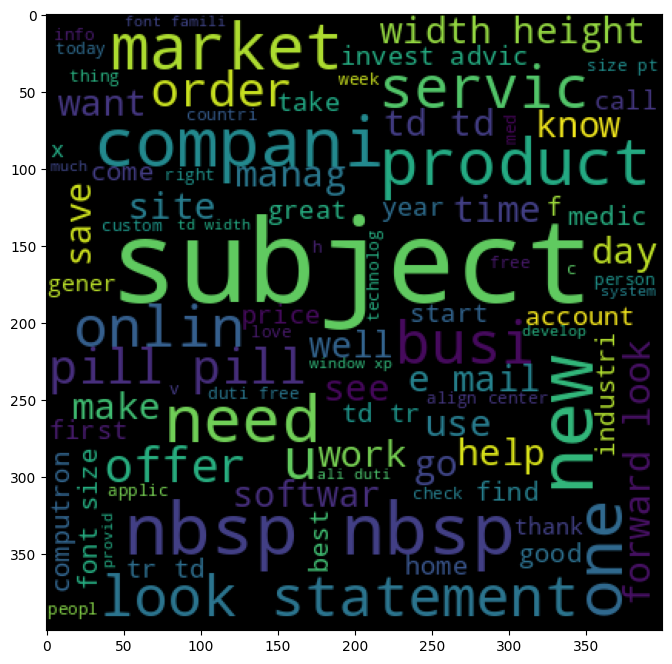

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(spam)
plt.show()

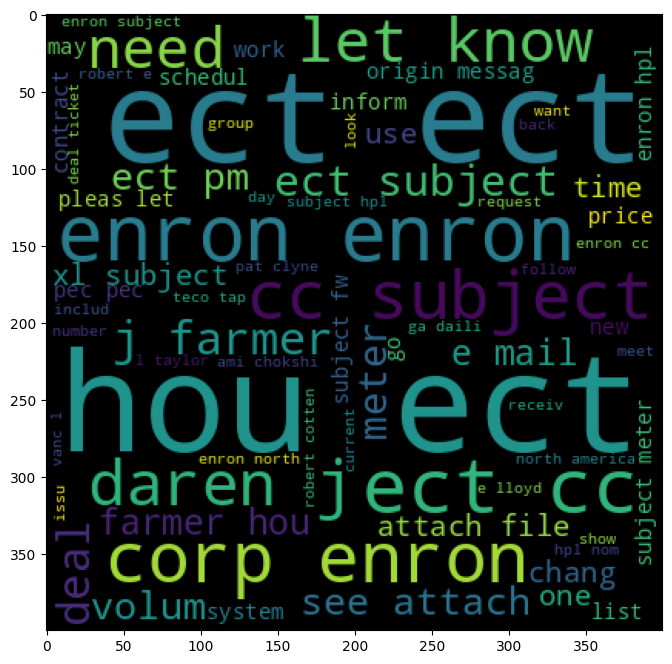

In [ ]:
spam=wc.generate(df[df['label_num']==0]['trans_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(spam)
plt.show()

In [ ]:
corpus=[]
for x in df[df['label_num']==1]['trans_text'].tolist():
  for word in x.split():
    corpus.append(word)


In [ ]:
corpus

['subject',
 'photoshop',
 'window',
 'offic',
 'cheap',
 'main',
 'trend',
 'abas',
 'darer',
 'prudent',
 'fortuit',
 'undergon',
 'lightheart',
 'charm',
 'orinoco',
 'taster',
 'railroad',
 'affluent',
 'pornograph',
 'cuvier',
 'irvin',
 'parkhous',
 'blameworthi',
 'chlorophyl',
 'robe',
 'diagrammat',
 'fogarti',
 'clear',
 'bayda',
 'inconvenienc',
 'manag',
 'repres',
 'smart',
 'hashish',
 'academi',
 'sharehold',
 'unload',
 'bad',
 'danielson',
 'pure',
 'caffein',
 'spaniard',
 'chargeabl',
 'levin',
 'subject',
 'look',
 'medic',
 'best',
 'sourc',
 'difficult',
 'make',
 'materi',
 'condit',
 'better',
 'best',
 'law',
 'easi',
 'enough',
 'ruin',
 'bad',
 'law',
 'excus',
 'found',
 'best',
 'simpliest',
 'site',
 'medic',
 'net',
 'perscript',
 'easi',
 'deliveri',
 'privat',
 'secur',
 'easi',
 'better',
 'see',
 'rightli',
 'pound',
 'week',
 'squint',
 'million',
 'got',
 'anyth',
 'ever',
 'want',
 'erect',
 'treatment',
 'pill',
 'anti',
 'depress',
 'pill',
 'wei

In [ ]:
corpus1=[]
for x in df[df['label_num']==0]['trans_text'].tolist():
  for word in x.split():
    corpus1.append(word)

In [ ]:
len(corpus1)

380475

In [ ]:
from collections import Counter
Counter(corpus1).most_common(30)

[('ect', 13690),
 ('hou', 7174),
 ('enron', 6442),
 ('subject', 6210),
 ('2000', 4209),
 ('deal', 3481),
 ('ga', 2784),
 ('com', 2713),
 ('meter', 2709),
 ('pleas', 2675),
 ('cc', 2324),
 ('hpl', 2291),
 ('pm', 2283),
 ('thank', 2068),
 ('2001', 1988),
 ('1', 1971),
 ('000', 1854),
 ('daren', 1837),
 ('00', 1795),
 ('10', 1754),
 ('01', 1701),
 ('need', 1690),
 ('3', 1663),
 ('corp', 1662),
 ('volum', 1645),
 ('forward', 1571),
 ('2', 1504),
 ('know', 1405),
 ('mmbtu', 1396),
 ('e', 1333)]

In [ ]:
pd.DataFrame(Counter(corpus).most_common(30))

,0,1
0,subject,1622
1,3,1229
2,com,989
3,http,981
4,compani,918
5,2,853
6,price,731
7,1,710
8,0,688
9,e,632


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(df['trans_text']).toarray()

In [ ]:
x

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=df['label_num']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [ ]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()

In [ ]:
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=gb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

[[696  17]
 [ 26 260]]
0.9569569569569569
0.9386281588447654


In [ ]:
mb.fit(x_train,y_train)
y_pred=mb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

[[699  14]
 [  8 278]]
0.977977977977978
0.952054794520548


In [ ]:
bb.fit(x_train,y_train)
y_pred=bb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

[[697  16]
 [130 156]]
0.8538538538538538
0.5454545454545454


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf=TfidfVectorizer()

In [ ]:
x=tf.fit_transform(df['trans_text']).toarray()

In [ ]:
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


[[696  17]
 [ 26 260]]
0.9569569569569569
0.9090909090909091


In [ ]:
mb.fit(x_train,y_train)
y_pred=mb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


[[699  14]
 [  8 278]]
0.977977977977978
0.972027972027972


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

[[698  15]
 [ 11 275]]
0.973973973973974
0.9482758620689655
